## HACETTEPE UNIVERSITY ELECTRICAL AND ELECTRONICS ENGINEERING
## ELE 489 HOMEWORK 2
##  Decision Tree Algorithm For The Banknote Authentication
ELİF SEDEF SEKKİN 2200357097

### Importing the libraries

In [2]:
#importing librares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [4]:
from google.colab import files
uploaded = files.upload()  #importing the file from your computer

Saving data_banknote_authentication.txt to data_banknote_authentication.txt


### Variance, Skewness, Kurtosis and Entropy
These features measure the basic statistical properties of the image, such as
the spread (variance), asymmetry (skewness), peakedness (kurtosis), and randomness (entropy) of pixel intensities.


*   **Variance** measures the spread of pixel values in an image. A high variance indicates high contrast, and a low variance indicates low contrast.
*   **Skewness** measures the asymmetry of the pixel value distribution. Positive skewness indicates the distribution is skewed to the right, and negative skewness indicates it’s skewed to the left.
*   **Kurtosis** measures the "tailedness" of the pixel value distribution. High kurtosis indicates that the distribution has outliers or heavy tails, while low kurtosis indicates that the distribution is more uniform.
*   **Entropy** measures the amount of information or randomness in the image. Higher entropy indicates more complexity or randomness in pixel values.


### Loading the Data to Pandas Data Frame

In [5]:
df = pd.read_csv("data_banknote_authentication.txt", header=None)   #loading the dataset to Data Frame
df.columns = ["variance", "skewness", "kurtosis", "entropy", "class"] #assigning the attributes
print(df.head())                                                      #previewing the data frame

   variance  skewness  kurtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


### Visualization of Data
We can see that the even though our features are separated, relationships between them are non-linear and complex so decision trees can be a good algorithm to deal with them. Decision trees handle non-linear data better than linear algorithms like Logistic Regression.

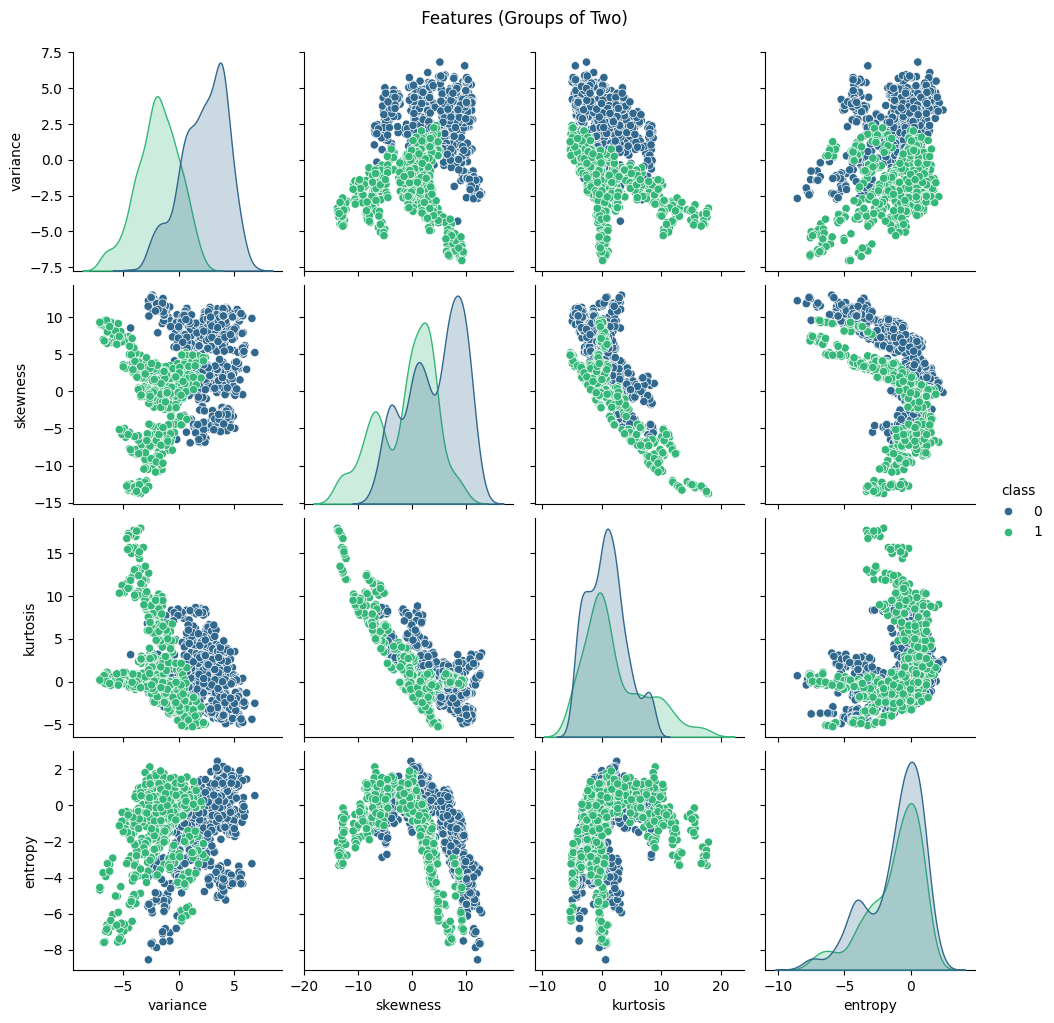

In [6]:
sns.pairplot(df, hue="class",palette='viridis')
plt.suptitle(" Features (Groups of Two)", y=1.02)
plt.show()

### Splitting the Data into Training and Test Sets
We have split the data into training (%80) and test (%20) datasets using sklearn train_test_split() function.

In [8]:
X = df.drop(['class'], axis=1)    #we are separating the attributes and Class

y = df['class']                   #assigning Class column to a new variable y

X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
X_train.shape ,X_test.shape

((1097, 4), (275, 4))

### Implementing The Decision Tree Algorithm
Here we are experimenting with different criterions and specifications such as gini index, entropy, maximum depth, and minimum split. Starting from the maximum depth, A higher value of max depth allows the tree to grow deeper which may result with fitting complex models too well which potentially result in overfitting. Having a small value may prevent overfitting but this time it may result with a shallow tree.
If we continue with minimum split value it can be defined as the minimum number of samples required to split an internal node. higher value means the tree is more conservative in making splits, which can prevent overfitting by forcing the tree to generalize more.A lower value allows the tree to make more splits, which can make the model more complex and prone to overfitting.
Gini index and entropy are different measures of impurity. Lower impurity is  desired to make better decisions. A lower Gini value means a more pure node which means the node contains mostly one class. A low entropy means the data is more ordered and easy to classify.

In [18]:
decTree_gini4_min2= DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=2,
    random_state=42
)

decTree_gini4_min2.fit(X_train, y_train)
y_pred_gini4_min2 = decTree_gini4_min2.predict(X_test)

decTree_gini4= DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=5,
    random_state=42
)

decTree_gini4.fit(X_train, y_train)
y_pred_gini4 = decTree_gini4.predict(X_test)

decTree_entropy4 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    min_samples_split=5,
    random_state=42
)

decTree_entropy4.fit(X_train, y_train)
y_pred_entropy4 = decTree_entropy4.predict(X_test)


decTree_entropy8 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,
    min_samples_split=5,
    random_state=42
)

decTree_entropy8.fit(X_train, y_train)
y_pred_entropy8 = decTree_entropy8.predict(X_test)


decTree_ginimin16= DecisionTreeClassifier(
    criterion='gini',
    max_depth=8,
    min_samples_split=16,
    random_state=42
)

decTree_ginimin16.fit(X_train, y_train)
y_pred_gini8_min2 = decTree_ginimin16.predict(X_test)

decTree_gini8 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=8,
    min_samples_split=5,
    random_state=42
)

decTree_gini8.fit(X_train, y_train)
y_pred_gini8 = decTree_gini8.predict(X_test)


### Confusion Matrixs and Classification Reports


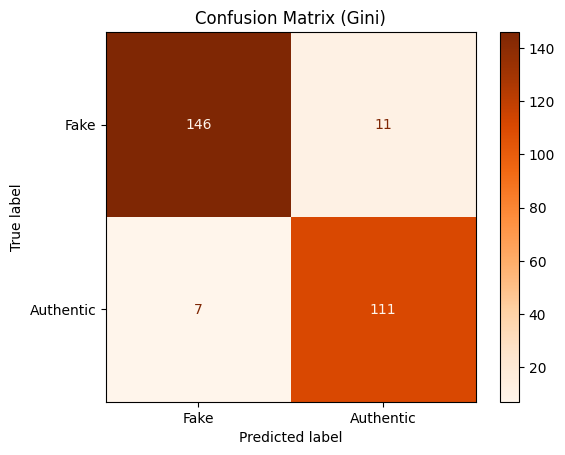

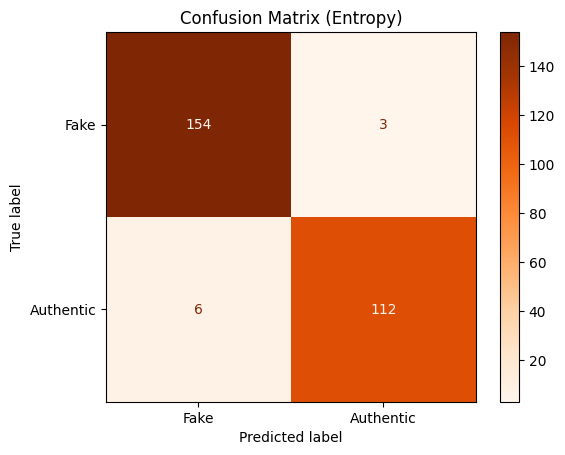

Classification Report (Gini):

              precision    recall  f1-score   support

           0     0.9542    0.9299    0.9419       157
           1     0.9098    0.9407    0.9250       118

    accuracy                         0.9345       275
   macro avg     0.9320    0.9353    0.9335       275
weighted avg     0.9352    0.9345    0.9347       275

Classification Report (Entropy):

              precision    recall  f1-score   support

           0     0.9625    0.9809    0.9716       157
           1     0.9739    0.9492    0.9614       118

    accuracy                         0.9673       275
   macro avg     0.9682    0.9650    0.9665       275
weighted avg     0.9674    0.9673    0.9672       275



In [12]:
ConfusionMatrixDisplay.from_estimator(decTree_gini4, X_test, y_test, display_labels=["Fake", "Authentic"], cmap="Oranges")
plt.title("Confusion Matrix (Gini)")
ConfusionMatrixDisplay.from_estimator(decTree_entropy4, X_test, y_test, display_labels=["Fake", "Authentic"], cmap="Oranges")
plt.title("Confusion Matrix (Entropy)")
plt.show()

print("Classification Report (Gini):\n")
print(classification_report(y_test, y_pred_gini4, digits=4))
print("Classification Report (Entropy):\n")
print(classification_report(y_test, y_pred_entropy4, digits=4))

### Decision Trees
Below you can see the decision trees for different parameters. The Gini and Entropy trees whose both with max_depth=4 look similar. When we increase max_depth to 8, the tree branches out and becomes more complex. However, setting min_samples_split=16 limits the tree growth, creating a simpler structure.

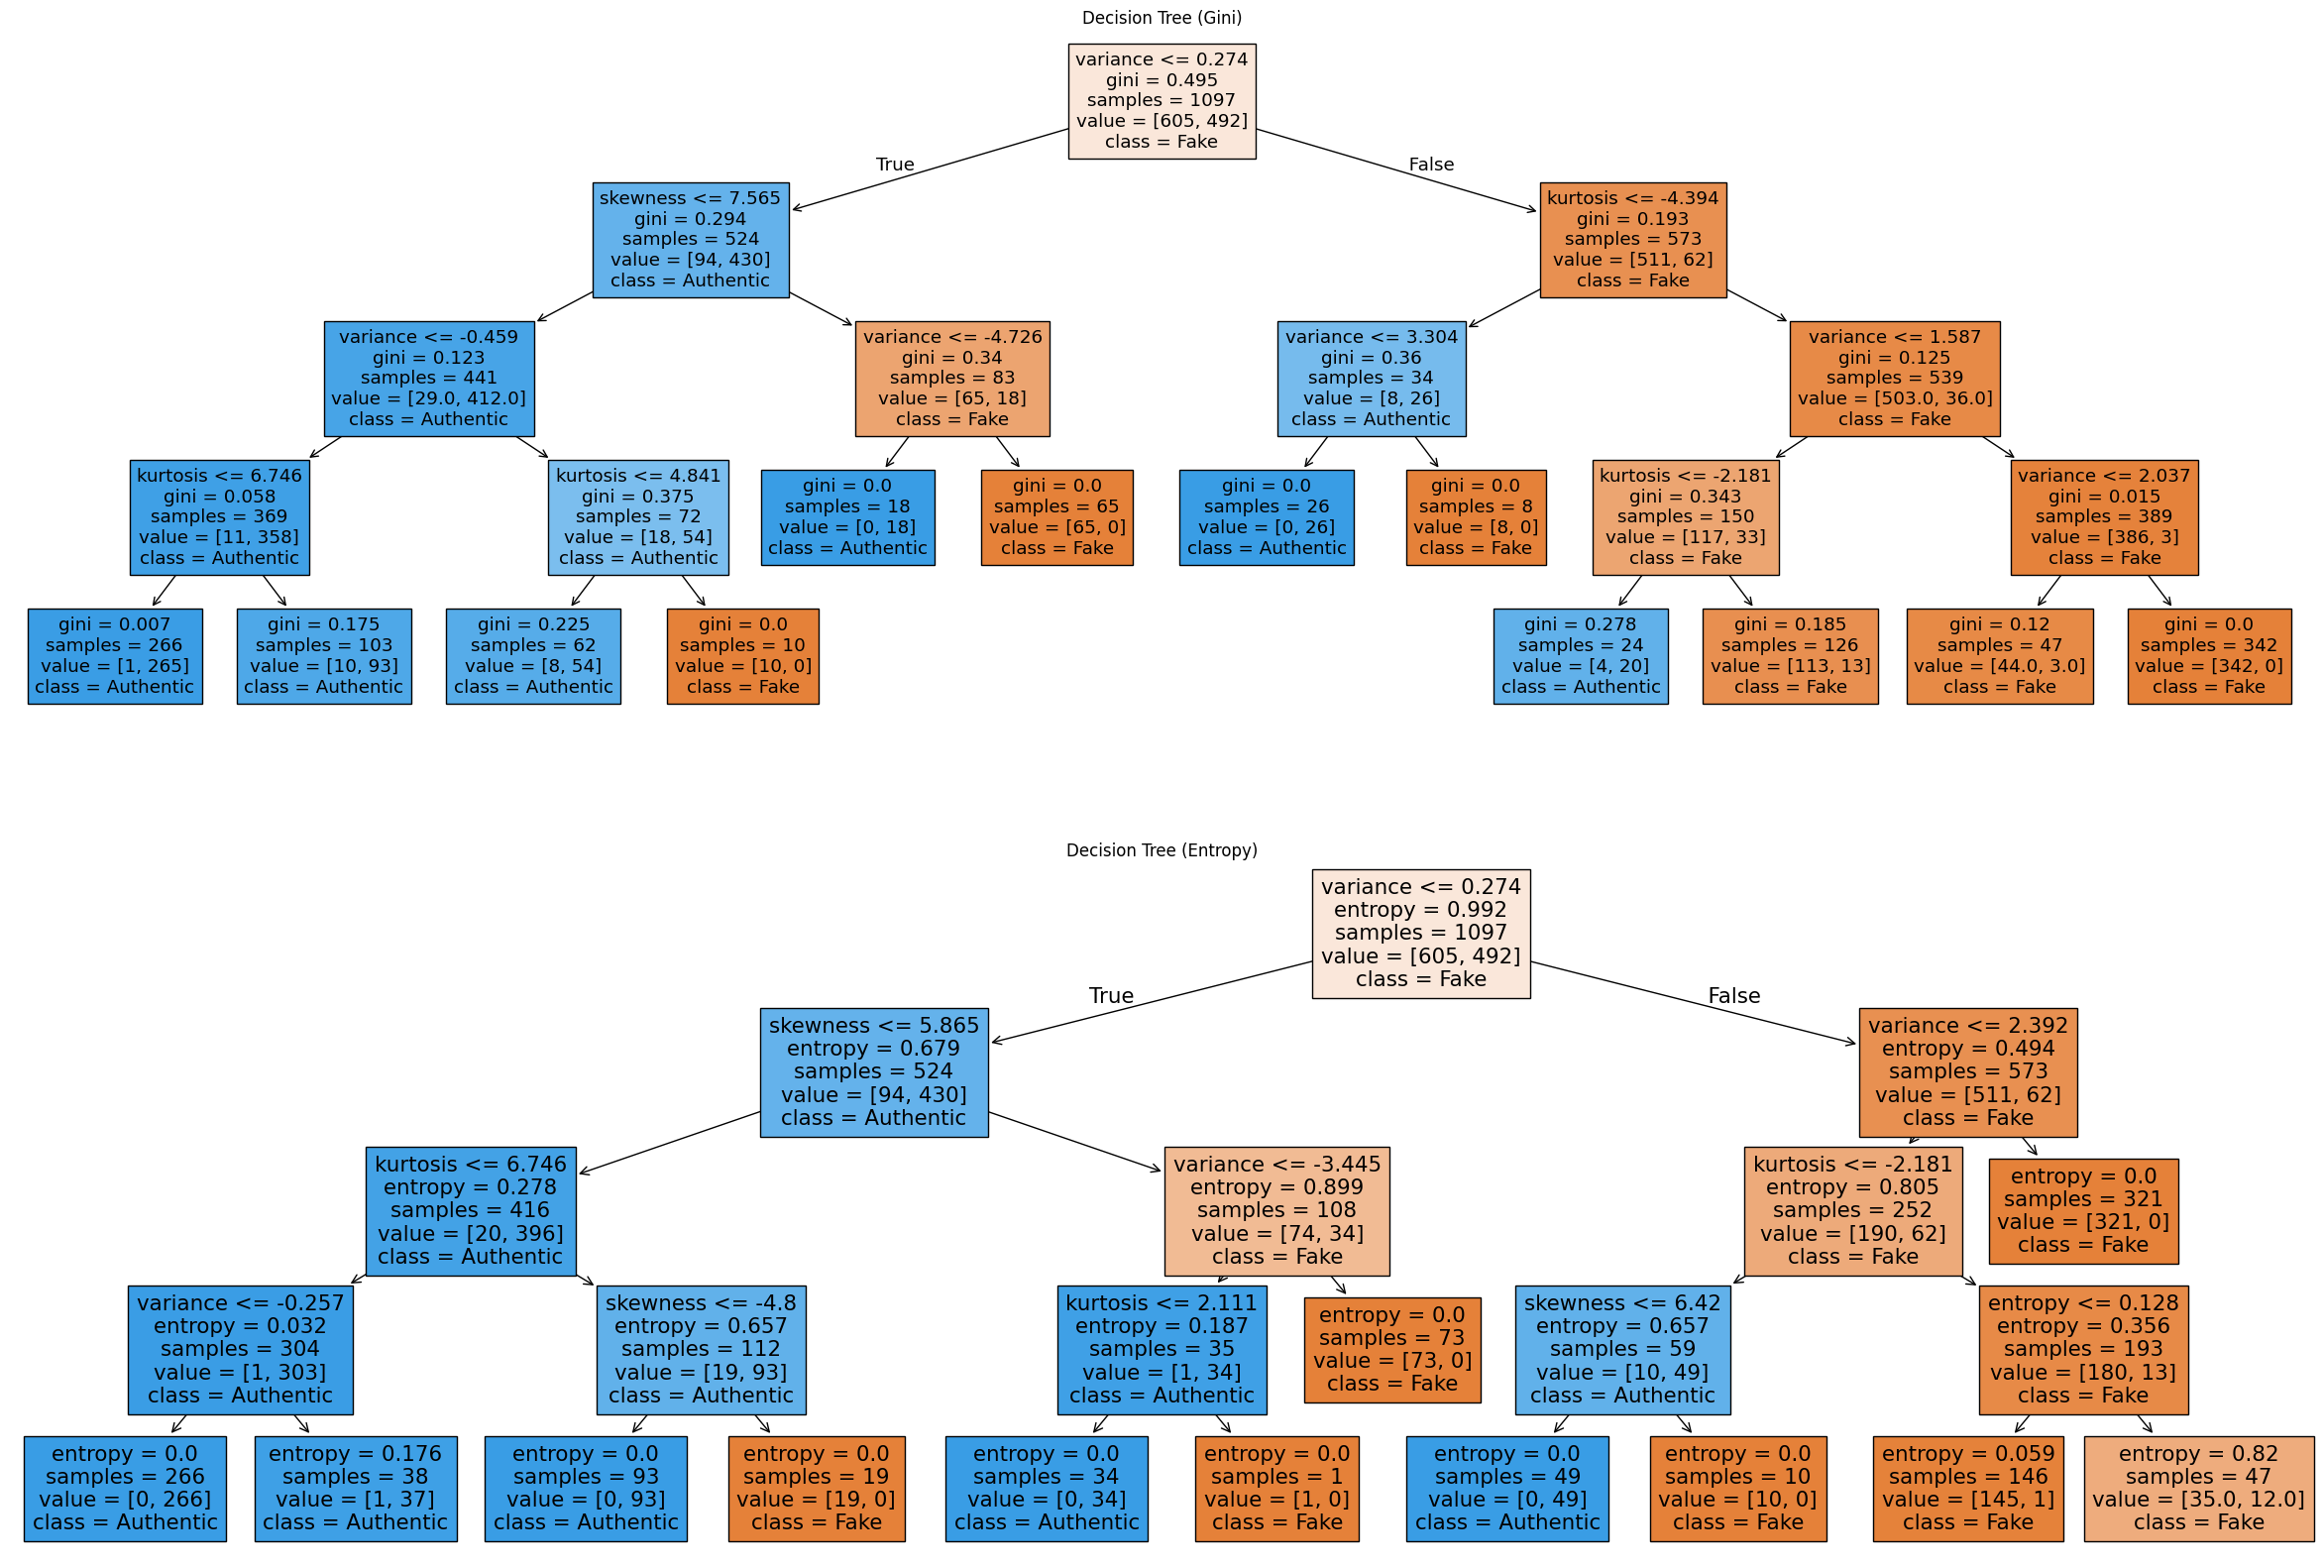

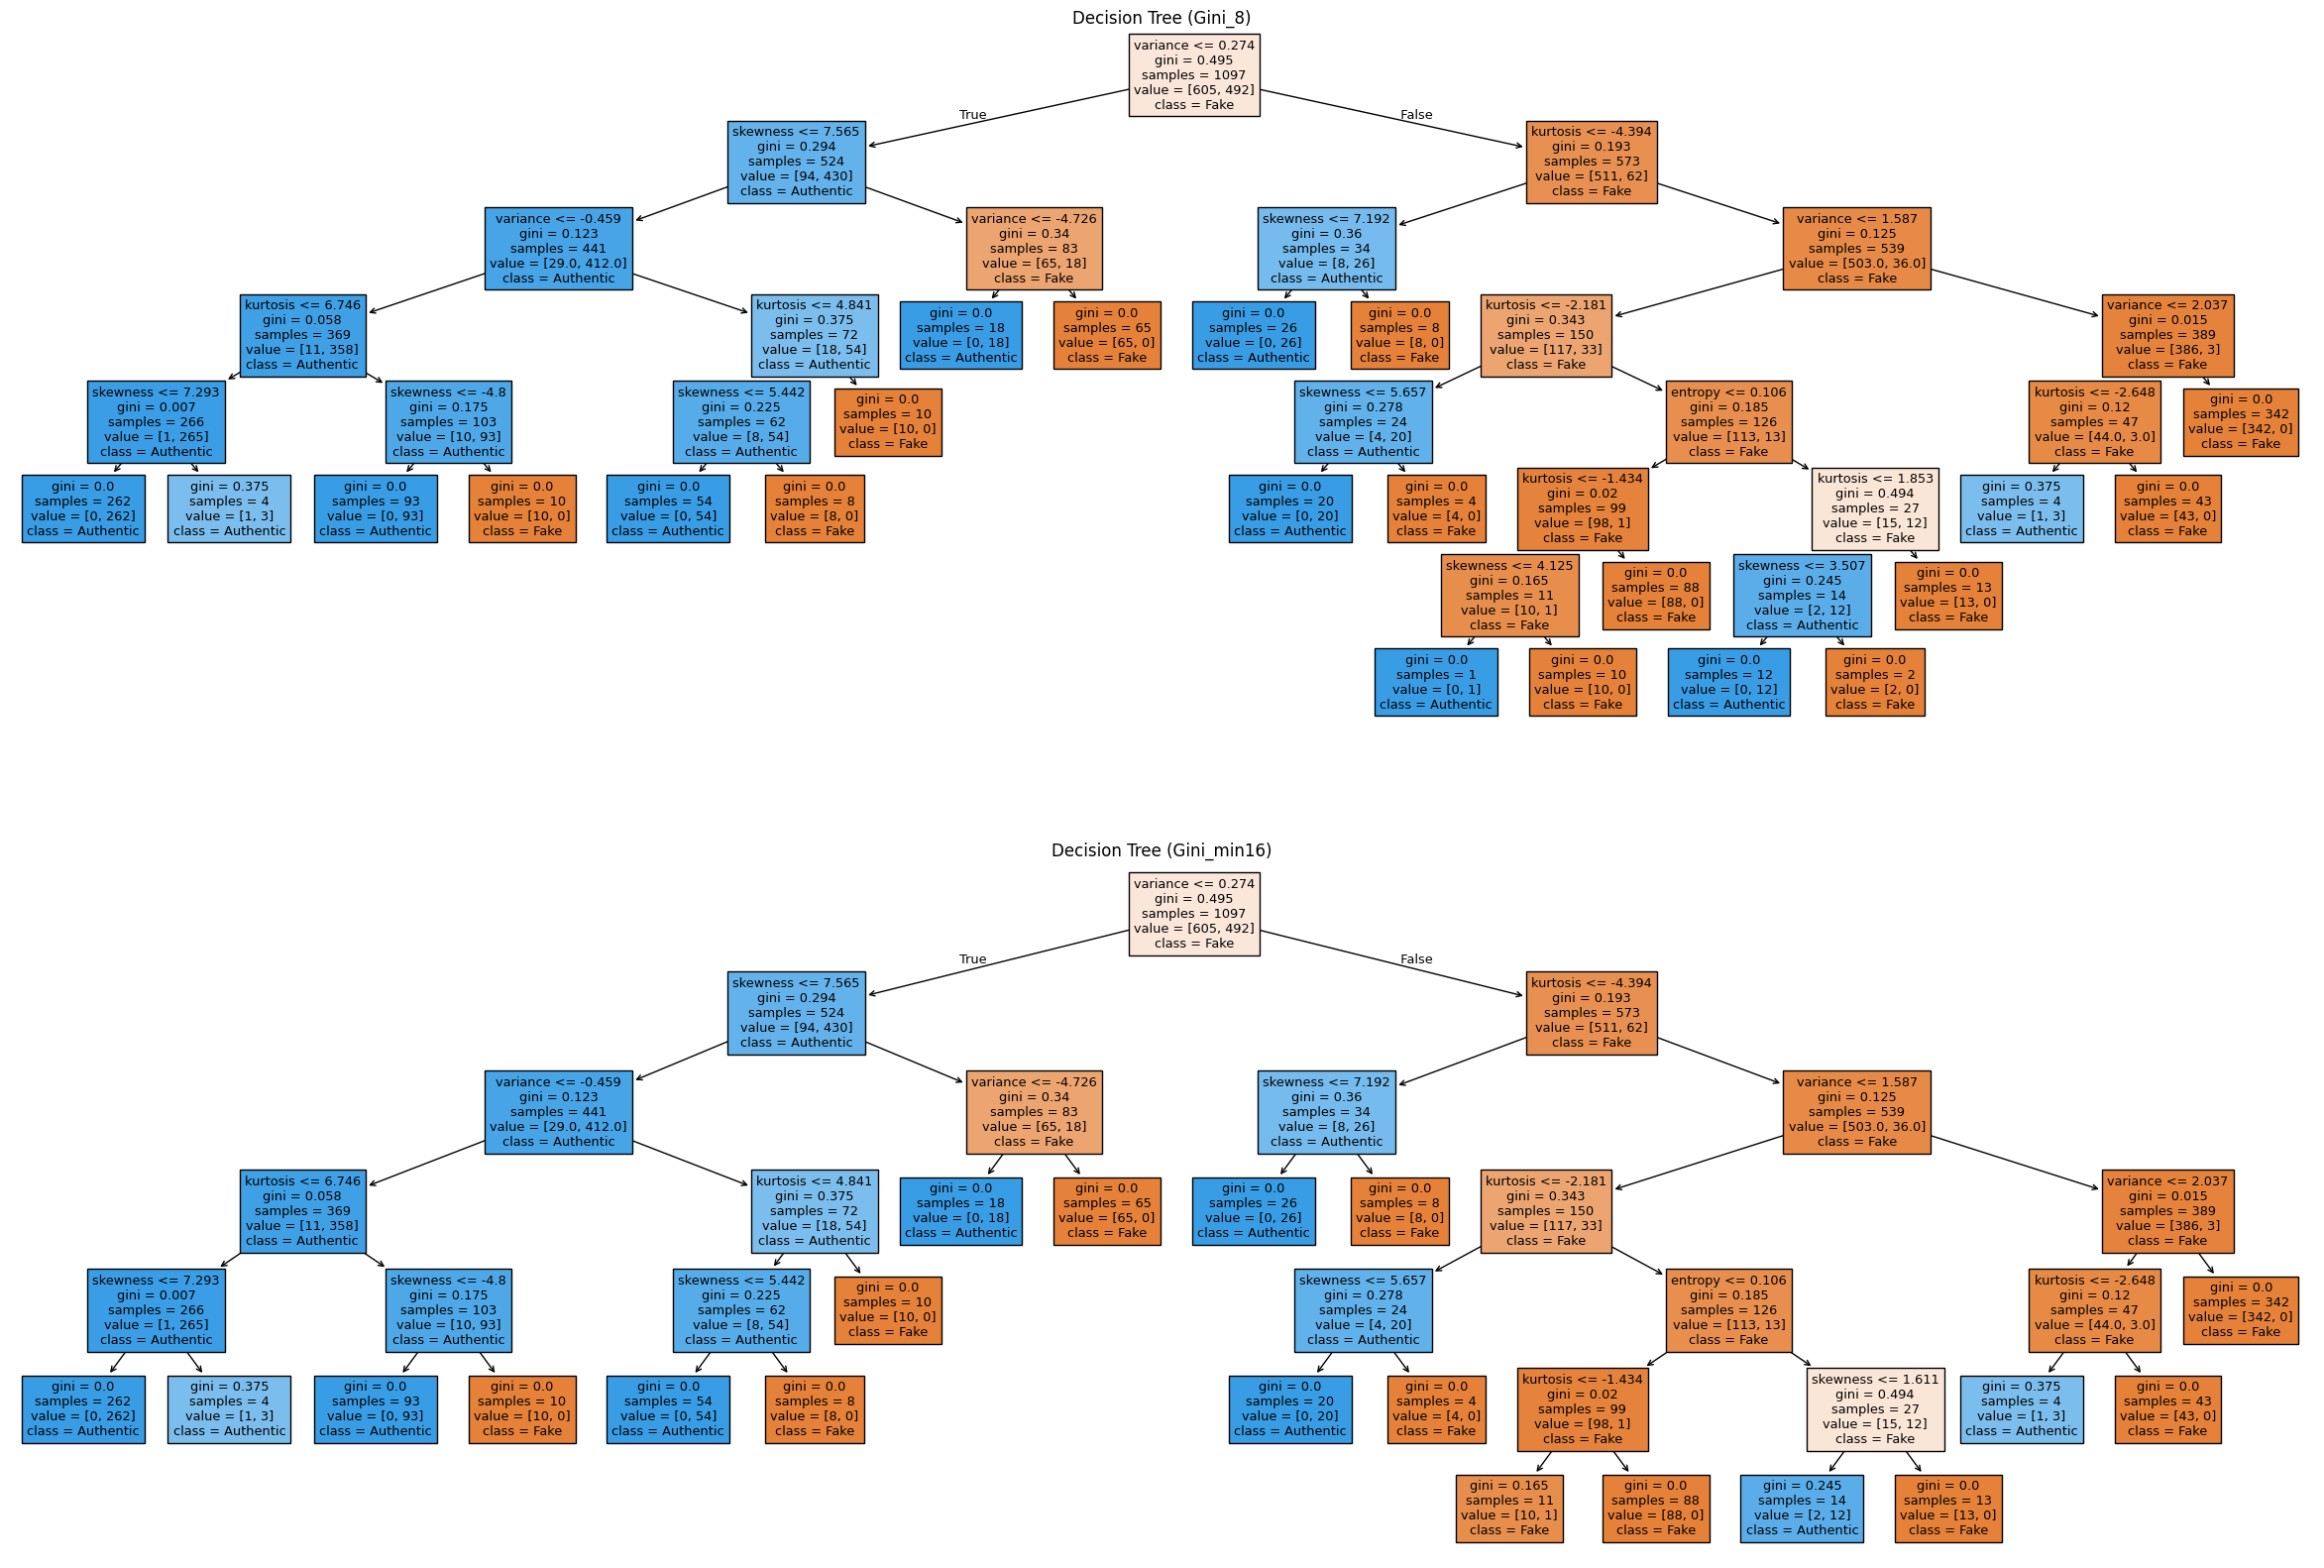

In [20]:
plt.figure(figsize=(30, 20))
plt.subplot(2,1,1)
plot_tree(decTree_gini4, feature_names=X_train.columns, class_names=["Fake", "Authentic"], filled=True)
plt.title("Decision Tree (Gini)")
plt.subplot(2,1,2)
plot_tree(decTree_entropy4, feature_names=X_train.columns, class_names=["Fake", "Authentic"], filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()
plt.figure(figsize=(30, 20))
plt.subplot(2,1,1)
plot_tree(decTree_gini8, feature_names=X_train.columns, class_names=["Fake", "Authentic"], filled=True)
plt.title("Decision Tree (Gini_8)")
plt.subplot(2,1,2)
plot_tree(decTree_ginimin16, feature_names=X_train.columns, class_names=["Fake", "Authentic"], filled=True)
plt.title("Decision Tree (Gini_min16)")
plt.show()

### Extracting and Plotting Feature Importances

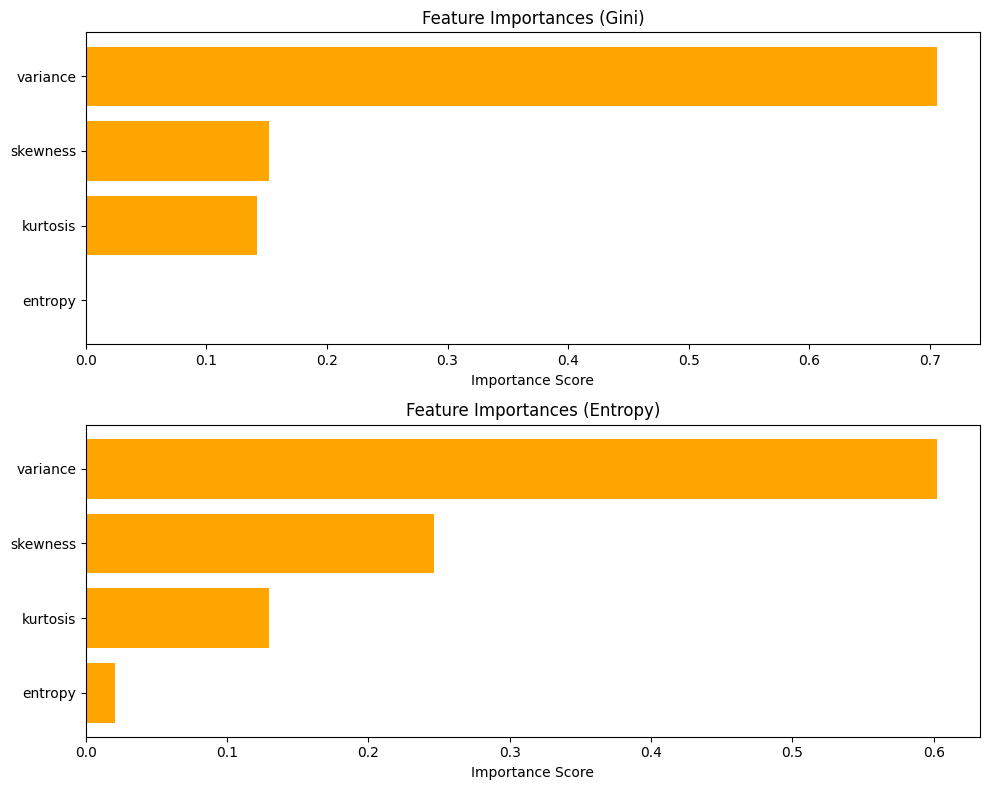

In [24]:
importances_gini = decTree_gini4.feature_importances_
importance_df_gini = pd.DataFrame({'Feature': X.columns,'Importance': importances_gini}).sort_values(by='Importance', ascending=False)


importances_entropy = decTree_entropy4.feature_importances_
importance_df_entropy = pd.DataFrame({'Feature': X.columns,'Importance': importances_entropy}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.barh(importance_df_gini['Feature'], importance_df_gini['Importance'], color='orange')
plt.xlabel("Importance Score")
plt.title("Feature Importances (Gini)")
plt.gca().invert_yaxis() #hihest importance is at the top
plt.tight_layout()
plt.subplot(2,1,2)
plt.barh(importance_df_entropy['Feature'], importance_df_entropy['Importance'], color='orange')
plt.xlabel("Importance Score")
plt.title("Feature Importances (Entropy)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Based on this feature importance analysis, the decision tree algorithm is likely focusing on how the distribution of features are spread out (variance) and its symmetry (skewness). This suggests that variance is a key differentiator for distinguishing between the classes.

### Comments on Decision Tree Algorithm for This Data Set
The variance feature has the highest importance score in both models, which is a good sign for the Decision Tree algorithm, as it suggests that the decision tree can rely on variance to make clear splits.
Also, Decision Trees can handle non-linear relationships, which is beneficial if the data distribution is not linear which seems to be the case for this dataset since the importance of skewness is also significant. This suggests that there may be some level of non-linearity in the data that a Decision Tree can capture more easily than linear models.